In [1]:
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

In [40]:
def visual_compare(experiment_names, mode='test_unknown_style', style_language='english', style_channel=6, test_font=None):
    if style_language=='english':
        content_language = 'chinese'
    else:
        content_language = 'english'
    if test_font is None:
        font_names = os.listdir('datasets/font/{}/chinese'.format(mode))
        test_font = random.choice(font_names)
    print(test_font)
    style_path = os.path.join('datasets', 'font', mode, style_language, test_font)
    style_image_paths = [os.path.join(style_path, sample) for sample in random.sample(os.listdir(style_path), style_channel)]
    
    gt_path = os.path.join('datasets', 'font', mode, content_language, test_font)
    test_characters = random.sample(os.listdir(gt_path), style_channel)
    gt_image_paths = [os.path.join(gt_path, sample) for sample in test_characters]
    
    plt.figure()
    for i in range(style_channel):
        image = plt.imread(style_image_paths[i])
        plt.subplot(len(experiment_names)+2, style_channel, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    
    for i, name in enumerate(experiment_names):
        for j, character in enumerate(test_characters):
            character = character.split('.')[0]
            image_path = os.path.join('results', name, mode+'_latest', 'images', '{}|{}|generated_images.png'.format(test_font, character))
            image = plt.imread(image_path)
            plt.subplot(len(experiment_names)+2, style_channel, style_channel*(i+1)+j+1)
            plt.imshow(image, cmap='gray')
            plt.axis('off')
    for i in range(style_channel):
        image = plt.imread(gt_image_paths[i])
        plt.subplot(len(experiment_names)+2, style_channel, style_channel*(len(experiment_names)+1)+i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()
    
    
def quantitative_compare(experiment_names, mode='test_unknown_style'):
    res = []
    for name in experiment_names:
        cur = []
        content_path = os.path.join('results', name, mode+'_latest', 'metrics', 'content', 'final_results.txt')
        with open(content_path, 'r') as f:
            for data in f:
                data = float(data.split(':')[1])
                cur.append(data)
        style_path = os.path.join('results', name, mode+'_latest', 'metrics', 'style', 'final_results.txt')
        with open(style_path, 'r') as f:
            for i, data in enumerate(f):
                if i==0 or i==4:
                    data = float(data.split(':')[1])
                    cur.append(data)
        res.append(cur)
    df = pd.DataFrame(data=res, columns=['content_acc', 'l1', 'ssim', 'msssim', 'content_fid', 'style_acc', 'style_fid'], index=experiment_names)
    df = df.reindex(columns=['l1', 'ssim', 'msssim', 'content_acc', 'content_fid', 'style_acc', 'style_fid'])
    return df

In [5]:
experiment_names = ['lambdal1=1','lambdal1=10', 'MLANH']

Fashionable dress Guang xin CU hei Font - Simplified Chinese


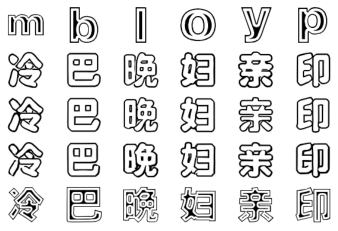

In [35]:
visual_compare(experiment_names, style_language='english')

In [39]:
quantitative_compare(experiment_names)

,l1,ssim,msssim,content_acc,content_fid,style_acc,style_fid
lambda_1=1,0.203886,0.298515,0.299159,0.987655,131.925435,0.082824,441.234247
lambda_1=10,0.184973,0.347177,0.358700,0.997752,105.709741,0.117492,422.341899
lambda_1=100,0.179410,0.368077,0.381788,0.998186,97.793591,0.117452,418.788505
